# Titanic Data Analysis

* 2440006715 - Daniel Alexander
* 2440018394 - Divaldy Putra Eka
* 2401960763 - Thomas Amarta G
* 2401960284 - Jeremiah Dylan Julianto
* 2440012421 - Christopher Nathanael

CLASS LC01

Titanic merupakan tragedi yang terjadi pada tahun 1912. Tragedi ini memakan banyak korban jiwa baik dari crew maupun penumpang yang ada pada kapal.

Pada projek kali ini kami ingin mempelajari dan menganalisa potensi survivability rate dan faktor apa saja yang mempengaruhi hal tersebut

# Import Libary & Dataset

Libary

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

Dataset

In [ ]:
!wget  https://raw.githubusercontent.com/geomencer12/Titanic-Bigdata/main/train.csv

--2022-06-28 05:41:14--  https://raw.githubusercontent.com/geomencer12/Titanic-Bigdata/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2022-06-28 05:41:14 (40.1 MB/s) - ‘train.csv’ saved [61194/61194]



In [ ]:
train = pd.read_csv("train.csv")

# Raw Data Exploration

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dari hasil tabel diatas kita dapat melihat bahwa ada sebuah anomali  dimana *Fare* memiliki nilai paling kecil 0. Akirnya kami melakukan riset  dan menemukan fakta bahwa dilansir dari www.encylopedia-titanica.org bahwa ada beberapa passanger yang memiliki id Karcis yang sama dibuktikan dngan data yang berada dibawah ini   

In [ ]:
train[train['Fare']==0].sort_values(by=['Ticket']) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


# Data Preparation


## Data Cleansing

In [ ]:
print(train.info())
print('============')
print('Null data')
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Null data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

Dari data diatas kita mendapatkan informasi bahwa ada 891 data yang ada pada file dan diantaranya terdapat NULL data pada kolom :

1. Age = 177
2. Cabin = 687
3. Embarked = 2
Dari data tersebut juga kita dapat mengetahui bahwa data yang kosong yaitu ***Age*** merupakan variabel kontinu dan ***Cabin*** dan ***Embarked*** variabel Kategori

Untuk mengatasi masalah tersebut kami memutuskan solusi berikut:

1. Untuk data Age kami akan menggunakan mean 
2. Untuk data Cabin kami akan menghapus kolom tersebut karena memiliki banyak nilai NULL yang dapat mempengaruhi hasil akir
3. Untuk data embark kami akan menggunakan algoritma label encoding untuk mengisi kekosongan tersebut.

In [ ]:
#Duplikasi Data 
#kami melakukan duplikasi data untuk melakukan perubahan data yang ada
dfTrain= train.copy(deep=True)

In [ ]:
#Data Cleansing Age
dfTrain['Age'].fillna(dfTrain['Age'].mean(),inplace = True)
#Data Cleasing Cabin
dropCl = ['Cabin']
dfTrain.drop(dropCl, axis=1, inplace = True)

In [ ]:
#Label Encoder Embarked
label = LabelEncoder()
dfTrain['Embarked'] = label.fit_transform(dfTrain['Embarked'])
dfTrain['Sex'] = label.fit_transform(dfTrain['Sex'])

In [ ]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
#Age Grouping
#<12 =0
#13-18 = 1
#19-59=2
#>60
#Grouping berdasarkan age grouping internasional untuk kesehatan medis
dfTrain.loc[ dfTrain['Age'] <= 12, 'Age'] = 0
dfTrain.loc[(dfTrain['Age'] > 12) & (dfTrain['Age'] <= 18), 'Age'] = 1
dfTrain.loc[(dfTrain['Age'] > 18) & (dfTrain['Age'] <= 59), 'Age'] = 2
dfTrain.loc[ dfTrain['Age'] > 59, 'Age'] = 3

In [ ]:
dfTrain.info()
print("======")
dfTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,1.795735,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,0.613357,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,3.000000,8.000000,6.000000,512.329200,3.000000


Dari hasil data yang sudah di bersihkan pada tahap pertama kami melihat bahwa ada beberapa data yang tidak memiliki korelasi pada tujuan awal penelitian kami yaitu *PassengerId* , *Ticket*, dan *Name* sehingga entitas tersebut dapat kita hilangkan dari data. Kami juga memutuskan menghilangkan **Fare** karena memiliki nilai yang beragam walaupun berada di kelas yang sama.

Kami juga memutuskan untuk menghapus value **Fare** karena kami menemukan anomali dimana keetika kedua orang memiliki tiket kelas yang sama namun seteleah dilihat mereka membayar dengan harga yang berbeda.

In [ ]:
dropCl = ['PassengerId','Ticket','Name','Fare']
dfTrain.drop(dropCl, axis=1, inplace = True)

In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


# Basic Analysis

Kami akan melakukan basic analysis terkait survival rate dengan atribut yang ada dan ditentukan

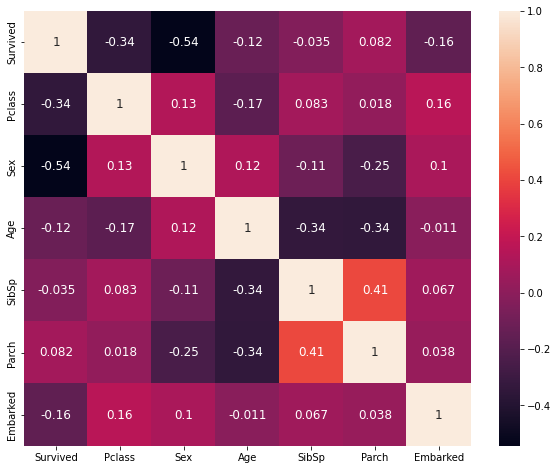

In [ ]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot= True, annot_kws={'fontsize':12})

## Sex

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan Jenis Kelamin')

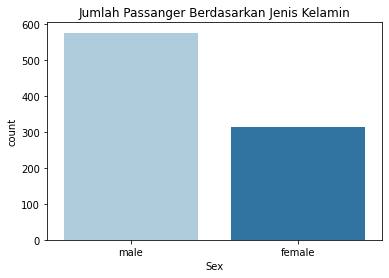

In [ ]:
# Jumlah Passanger Berdasarkan Sex
Sex1 = sns.countplot(data=train, x='Sex', palette="Paired")
Sex1.set_title("Jumlah Passanger Berdasarkan Jenis Kelamin")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan Sex')

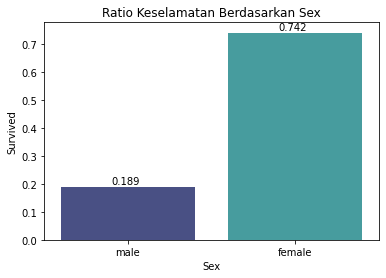

In [ ]:
# Ratio Keselamatan Berdasarkan Sex
Sex2 = sns.barplot(data=train, x='Sex', y='Survived', ci=None, palette="mako")
for p, labels in zip(Sex2.patches, train.groupby('Sex')['Survived'].mean().round(decimals=3).sort_values()):
    Sex2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
Sex2.set_title("Ratio Keselamatan Berdasarkan Sex")

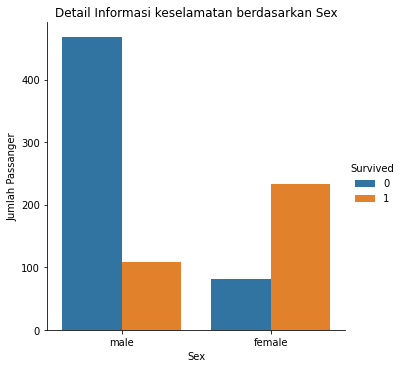

In [ ]:
# Detail Informasi keselamatan
g = sns.catplot(
    x= "Sex",
    hue= "Survived",
    data=train,
    kind="count" 
)
plt.xlabel('Sex')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan Sex')
plt.show()

Dari data diatas kita dapat menyimpulakan bahwa penumpang *Female* memiliki kemungkinan untuk selamat lebih tinggi dibanding penumpang *Male* 

1. Female 74%
2. Male 18%

## PClass

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan PClass')

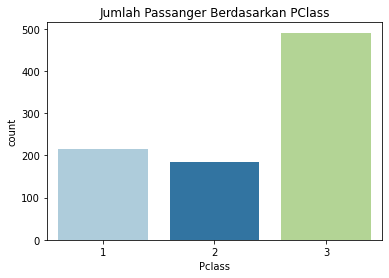

In [ ]:
# Jumlah Passanger Berdasarkan PClass
Pclass1 = sns.countplot(data=dfTrain, x='Pclass', palette="Paired") 
Pclass1.set_title("Jumlah Passanger Berdasarkan PClass")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan PClass')

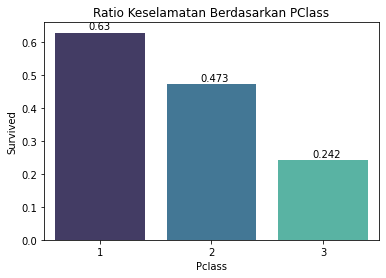

In [ ]:
# Ratio Keselamatan Berdasarkan PClass
Pclass2 = sns.barplot(data=dfTrain, x='Pclass', y='Survived', ci=None, palette="mako")
for p, labels in zip(Pclass2.patches, train.groupby('Pclass')['Survived'].mean().round(decimals=3)):
    Pclass2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
Pclass2.set_title("Ratio Keselamatan Berdasarkan PClass")

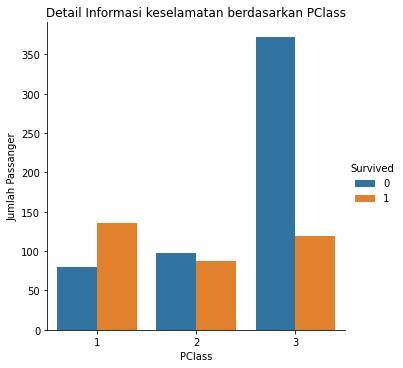

In [ ]:
# Detail Informasi keselamatan berdasarkan PClass
g = sns.catplot(
    x= "Pclass",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('PClass')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan PClass')
plt.show()

Dari data diatas kita dapat menyimpulakan bahwa penumpang pada *Class 1* memiliki kemungkinan untuk selamat lebih tinggi untuk lebih detailnya akan diurutkan sebagai berikut

Class 1> Class 2> Class 3
63% > 47.3%>24.2%

## Sibling/Spouse (SibSp)

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan SibSP')

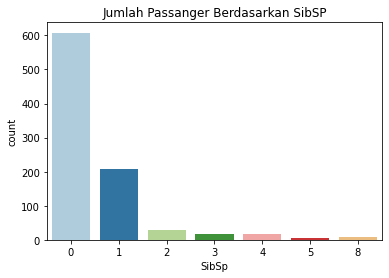

In [ ]:
# Jumlah Passanger Berdasarkan SibSp
SibSp1 = sns.countplot(data=dfTrain, x='SibSp', palette="Paired") 
SibSp1.set_title("Jumlah Passanger Berdasarkan SibSP")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan SibSp')

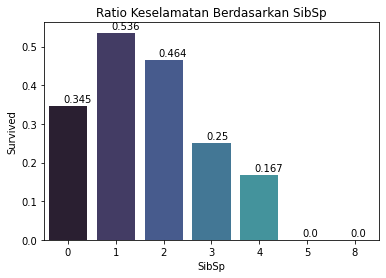

In [ ]:
# Ratio Keselamatan Berdasarkan SibSp
Sibsp2 = sns.barplot(data=dfTrain, x='SibSp', y='Survived', ci=None, palette="mako")
for p, labels in zip(Sibsp2.patches, train.groupby('SibSp')['Survived'].mean().round(decimals=3)):
    Sibsp2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
Sibsp2.set_title("Ratio Keselamatan Berdasarkan SibSp")

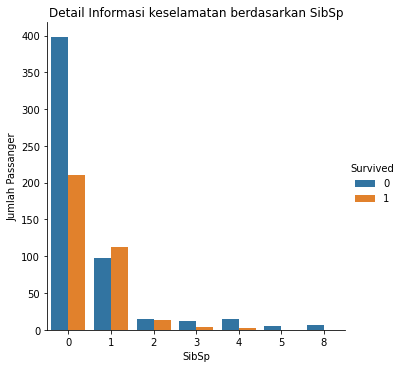

In [ ]:
# Detail Informasi keselamatan berdasarkan SibSp
g = sns.catplot(
    x= "SibSp",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('SibSp')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan SibSp')
plt.show()

Dari data diatas kita dapat menyimpulakan bahwa penumpang yang bersama dengan 1-2 Sibling/Spouse memiliki kemungkinan untuk selamat lebih tinggi dengan detail berikut:

1>2>0>3>4>5,8

## Parent/Child (Parch)

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan Parch')

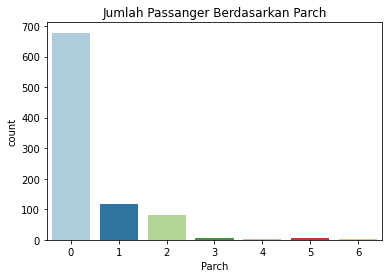

In [ ]:
# Jumlah Passanger Berdasarkan Parch
Parch1 = sns.countplot(data=dfTrain, x='Parch', palette="Paired") 
Parch1.set_title("Jumlah Passanger Berdasarkan Parch")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan Parch')

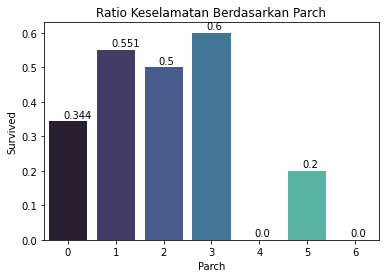

In [ ]:
# Ratio Keselamatan Berdasarkan SibS
Parch2 = sns.barplot(data=dfTrain, x='Parch', y='Survived', ci=None, palette="mako")
for p, labels in zip(Parch2.patches, train.groupby('Parch')['Survived'].mean().round(decimals=3)):
    Parch2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
Parch2.set_title("Ratio Keselamatan Berdasarkan Parch")

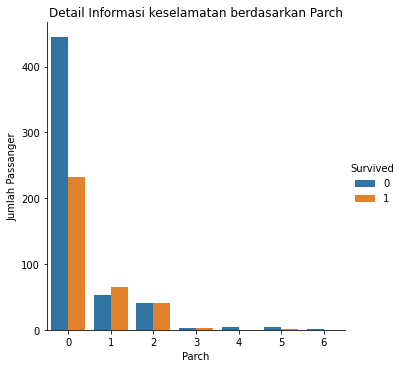

In [ ]:
# Detail Informasi keselamatan berdasarkan Parch
g = sns.catplot(
    x= "Parch",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('Parch')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan Parch')
plt.show()

Dari data diatas kita dapat menyimpulakan bahwa penumpang yang bersama 1-3 *Parent/Child* memiliki kemungkinan untuk selamat lebih tinggi 
dengan detail sebagai berikut
3>1>2>0>5>4>6

### Deep analysis SibSp and Parch relation

Dari hasil basic analysis diatas kita dapat membuat kesimpulan baru dimana Parch dan SibSp memiliki relasi dan keunikan dimana ketika penumpnag memiliki jumlah SibSp = 0 dan Parch =0 memiliki probabilitas keselamtan yang sama namun disini kita melihat ada perbedaan cukup siginifikan dimana ketika SibSp = 3 dan Parch =3 memiliki perbedaan ratio yang tinggi begitu juga perbedaan pada SibSp dan Parch yang bernilai 4 dan 5.

Sehingga kami memutuskan untuk membuat kolom baru yaitu Family Size dan IsAlone untuk mengetahui lebih jelas relasi yang ada.

#### Family Size


In [ ]:
#Family Size
dfTrain['FamilySize'] = dfTrain['SibSp']+dfTrain['Parch']+1
# +1 adlaah subject / passanger  yang bersangkutan

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan Family Size')

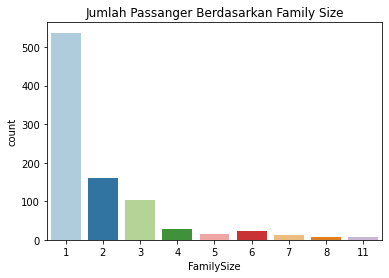

In [ ]:
# Jumlah Passanger Berdasarkan Family Size
FamilySize1 = sns.countplot(data=dfTrain, x='FamilySize', palette="Paired") 
FamilySize1.set_title("Jumlah Passanger Berdasarkan Family Size")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan Family Size')

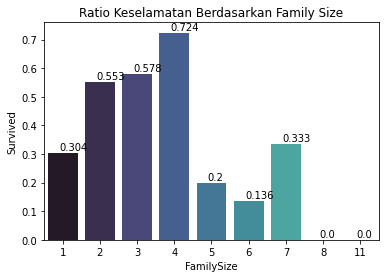

In [ ]:
# Ratio Keselamatan Berdasarkan Family Size
FamilySize2 = sns.barplot(data=dfTrain, x='FamilySize', y='Survived', ci=None, palette="mako")
for p, labels in zip(FamilySize2.patches, dfTrain.groupby('FamilySize')['Survived'].mean().round(decimals=3)):
    FamilySize2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
FamilySize2.set_title("Ratio Keselamatan Berdasarkan Family Size")

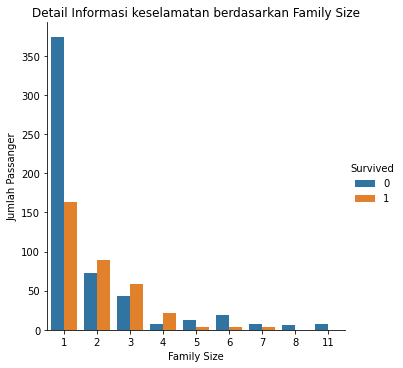

In [ ]:
# Detail Informasi keselamatan berdasarkan Parch
g = sns.catplot(
    x= "FamilySize",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('Family Size')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan Family Size')
plt.show()

Dari data diatas kita dapat menyimpulkan bahwa setiap penumpang yang meimiliki *Family Size* sebesar 2, 3, 4, dan 7 memiliki potensi untuk selamat lebih tinggi


Dari data ini kita melihat jika *FamilySize* =1 masih memiliki probabilitas selamat yang tidak jauh berbeda dengan penumpang dengan *SibSp* atau *Parch* yang bernilai 0. 

#### IsAlone

In [ ]:
#IsAlone
dfTrain['IsAlone']=1
dfTrain['IsAlone'].loc[dfTrain['FamilySize']>1]=0
# IsAlone =1 jika Passanger memiliki nilai SibSp dan Parch 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan IsAlone')

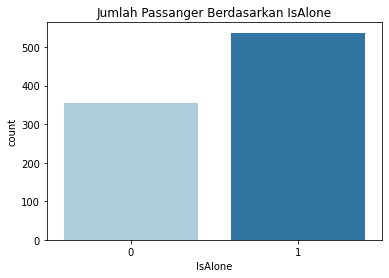

In [ ]:
# Jumlah Passanger Berdasarkan IsAlone

Pclass1 = sns.countplot(data=dfTrain, x='IsAlone', palette="Paired") 

Pclass1.set_title("Jumlah Passanger Berdasarkan IsAlone")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan IsAlone')

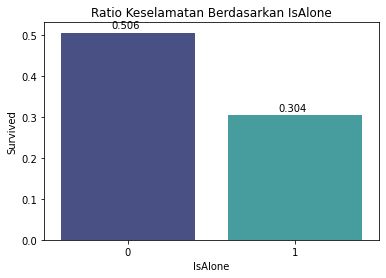

In [ ]:
# Ratio Keselamatan Berdasarkan IsAlone
Pclass2 = sns.barplot(data=dfTrain, x='IsAlone', y='Survived', ci=None, palette="mako")

for p, labels in zip(Pclass2.patches, dfTrain.groupby('IsAlone')['Survived'].mean().round(decimals=3)):
    Pclass2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))

   

Pclass2.set_title("Ratio Keselamatan Berdasarkan IsAlone")

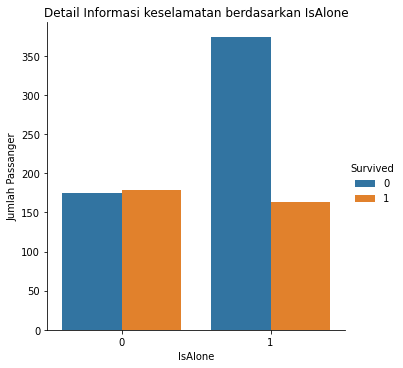

In [ ]:
# Detail Informasi keselamatan berdasarkan Parch
g = sns.catplot(
    x= "IsAlone",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('IsAlone')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan IsAlone')
plt.show()

Dari hasil data diatas kita dapat melihat bahwa terbukti bahwa setiap *Passenger* yang membawa keluarga memiliki probabilitas tinggi untuk selamat. Hal ini membuktikan pernyataan kita sebelumnya.

## Age

Age Group Category

1. 0-12 years old = age group 0
2. 13-18 years old = age group 1
3. 19-59 years old = age group 2
4. ">59" yeras old  = age group 3

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan Age')

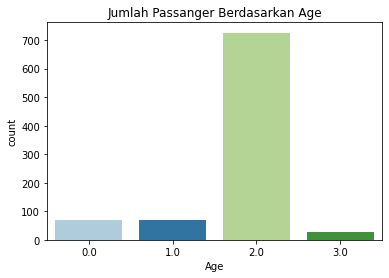

In [ ]:
# Jumlah Passanger Berdasarkan Age
Pclass1 = sns.countplot(data=dfTrain, x='Age', palette="Paired") 
Pclass1.set_title("Jumlah Passanger Berdasarkan Age")


Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan Age')

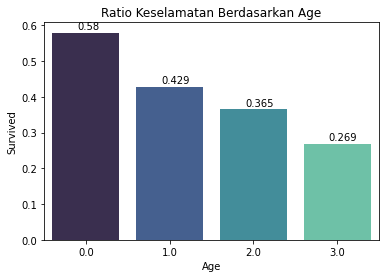

In [ ]:
# Ratio Keselamatan Berdasarkan Age
Pclass2 = sns.barplot(data=dfTrain, x='Age', y='Survived', ci=None, palette="mako")
for p, labels in zip(Pclass2.patches, dfTrain.groupby('Age')['Survived'].mean().round(decimals=3)):
    Pclass2.annotate(labels, (p.get_x()+0.30, p.get_height()+0.01))
Pclass2.set_title("Ratio Keselamatan Berdasarkan Age")


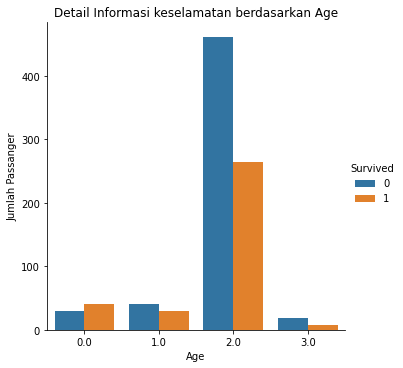

In [ ]:
# Detail Informasi keselamatan berdasarkan Age
g = sns.catplot(
    x= "Age",
    hue= "Survived",
    data=dfTrain,
    kind="count" 
)
plt.xlabel('Age')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan Age')
plt.show()

Dari data diatas kita dapat melihat bahwa *Passegner* yang berada di age Group 0 (0-12 yo) memiliki kemungkinan selamat lebih **tinggi** dibanding age group lainnya.


## Embarked

Informasti terkait Embarked

S = Southampton, U.K

C = Cherbourg, France

Q = Queesntown, Ireland

Text(0.5, 1.0, 'Jumlah Passanger Berdasarkan Embarked')

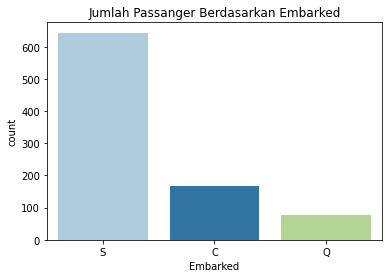

In [ ]:
# Jumlah Passanger Berdasarkan Embarked
Embarked1 = sns.countplot(data=train, x='Embarked', palette="Paired") 
Embarked1.set_title("Jumlah Passanger Berdasarkan Embarked")

Text(0.5, 1.0, 'Ratio Keselamatan Berdasarkan Embarked')

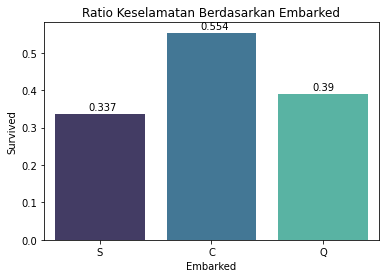

In [ ]:
# Ratio Keselamatan Berdasarkan Embarked
Embarked2 = sns.barplot(data=train, x='Embarked', y='Survived', ci=None, palette="mako")

anot = Embarked2.patches
labeling = train.groupby('Embarked')['Survived'].mean().round(decimals=3)
Embarked2.annotate(labeling[2],(anot[0].get_x()+0.30, anot[0].get_height()+0.01))
Embarked2.annotate(labeling[0],(anot[1].get_x()+0.30, anot[1].get_height()+0.01))
Embarked2.annotate(labeling[1],(anot[2].get_x()+0.30, anot[2].get_height()+0.01))

Embarked2.set_title("Ratio Keselamatan Berdasarkan Embarked")

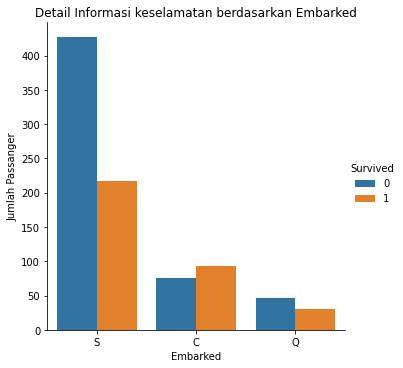

In [ ]:
# Detail Informasi keselamatan berdasarkan Embarked
g = sns.catplot(
    x= "Embarked",
    hue= "Survived",
    data=train,
    kind="count" 
)
plt.xlabel('Embarked')
plt.ylabel('Jumlah Passanger')
plt.title('Detail Informasi keselamatan berdasarkan Embarked')
plt.show()

Dari data ditas kita dapat menyimpulkan bahwa *Passanger* yang pergi dari Cherbough,France memiliki kemungkinan selamat lebih tinggi.

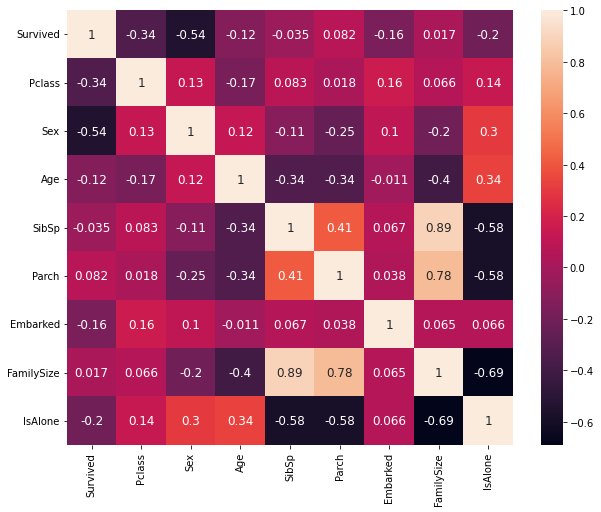

In [ ]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot= True, annot_kws={'fontsize':12})

# Deep analysis for Embarked

Pada kasus ini setelah kita tahu bahwa penumpang yang tidak sendiri dan membawa keluarga memiliki probabilitas selamat tinggi maka kami ingin melakukan analisa mendalam terkait:
1. Berapa banyk jumlah penumpang dengan family size lebih dari 1 dan sendiri
2. Berapa banyak jumlah penumpang dengan umur < 13
3. Berapa banyak jumlah penumpang wanita 
4. Berapa jumalh penumpang sesuai PClass

#### Jumlah Family Size berdasarkan Embarked

Embarked Legend
1. S = 2
2. Q = 1
3. C = 0

In [ ]:
#Jumlah penumpang sesuai Family Size
FamSizeE = dfTrain[dfTrain['Embarked']==0]

In [ ]:
#FamSizeE.head()
#FamSizeE.describe()
FamSizeE.info()
#FamSizeE.loc[:,'FamilySize']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 889
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    168 non-null    int64  
 1   Pclass      168 non-null    int64  
 2   Sex         168 non-null    int64  
 3   Age         168 non-null    float64
 4   SibSp       168 non-null    int64  
 5   Parch       168 non-null    int64  
 6   Embarked    168 non-null    int64  
 7   FamilySize  168 non-null    int64  
 8   IsAlone     168 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 13.1 KB


[]

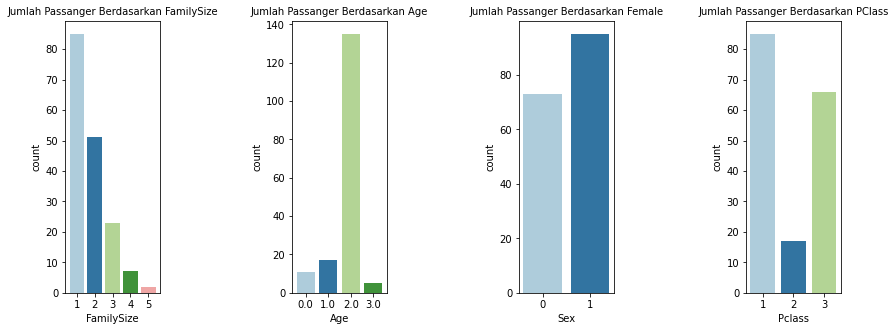

In [ ]:
fig = plt.figure(figsize=(20,5))
spec = gridspec.GridSpec(ncols=10, nrows=1)

#Jumlah Berdasarkan Family Size
figure1 = fig.add_subplot(spec[0])
barchart1 = sns.countplot(data=FamSizeE, x='FamilySize', palette="Paired") 

barchart1.set_title("Jumlah Passanger Berdasarkan FamilySize",fontsize=10)
figure1.plot()
#Jumlah Berdasarkan Age
figure2 = fig.add_subplot(spec[2])
barchart2 = sns.countplot(data=FamSizeE, x='Age', palette="Paired") 

barchart2.set_title("Jumlah Passanger Berdasarkan Age",fontsize=10)
figure2.plot()
# Jumlah berdasarkan Sex (female)
figure3 = fig.add_subplot(spec[4])
barchart3 = sns.countplot(data=FamSizeE, x='Sex', palette="Paired") 

barchart3.set_title("Jumlah Passanger Berdasarkan Female",fontsize=10)
figure3.plot()
# Jumlah berdasarkan PClass
figure4 = fig.add_subplot(spec[6])
barchart4 = sns.countplot(data=FamSizeE, x='Pclass', palette="Paired") 

barchart4.set_title("Jumlah Passanger Berdasarkan PClass",fontsize=10)
figure4.plot()

In [ ]:
FamSizeQ = dfTrain[dfTrain['Embarked']==1].reset_index()

[]

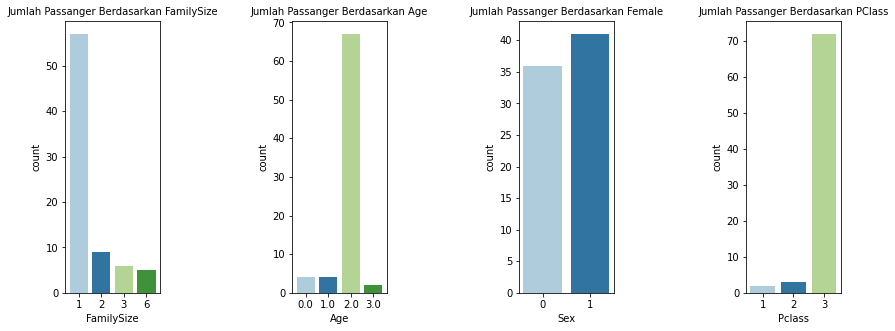

In [ ]:
fig = plt.figure(figsize=(20,5))
spec = gridspec.GridSpec(ncols=10, nrows=1)

#Jumlah Berdasarkan Family Size
figure1 = fig.add_subplot(spec[0])
barchart1 = sns.countplot(data=FamSizeQ, x='FamilySize', palette="Paired") 

barchart1.set_title("Jumlah Passanger Berdasarkan FamilySize",fontsize=10)
figure1.plot()
#Jumlah Berdasarkan Age
figure2 = fig.add_subplot(spec[2])
barchart2 = sns.countplot(data=FamSizeQ, x='Age', palette="Paired") 

barchart2.set_title("Jumlah Passanger Berdasarkan Age",fontsize=10)
figure2.plot()
# Jumlah berdasarkan Sex (female)
figure3 = fig.add_subplot(spec[4])
barchart3 = sns.countplot(data=FamSizeQ, x='Sex', palette="Paired") 

barchart3.set_title("Jumlah Passanger Berdasarkan Female",fontsize=10)
figure3.plot()
# Jumlah berdasarkan PClass
figure4 = fig.add_subplot(spec[6])
barchart4 = sns.countplot(data=FamSizeQ, x='Pclass', palette="Paired") 

barchart4.set_title("Jumlah Passanger Berdasarkan PClass",fontsize=10)
figure4.plot()

In [ ]:
FamSizeS = dfTrain[dfTrain['Embarked']==2].reset_index()

[]

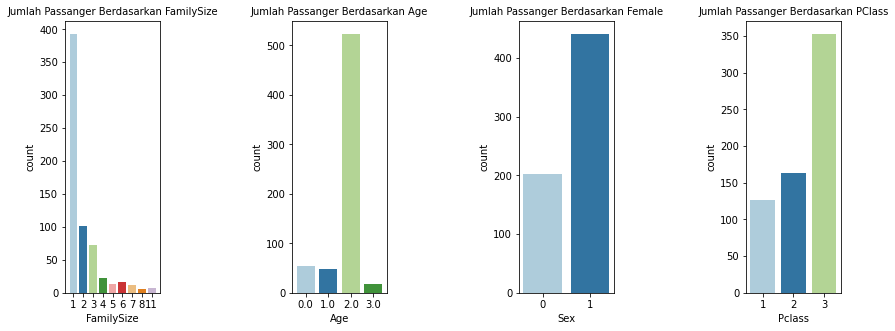

In [ ]:
fig = plt.figure(figsize=(20,5))
spec = gridspec.GridSpec(ncols=10, nrows=1)


#Jumlah Berdasarkan Family Size
figure1 = fig.add_subplot(spec[0])
barchart1 = sns.countplot(data=FamSizeS, x='FamilySize', palette="Paired") 

barchart1.set_title("Jumlah Passanger Berdasarkan FamilySize",fontsize=10)
figure1.plot()
#Jumlah Berdasarkan Age
figure2 = fig.add_subplot(spec[2])
barchart2 = sns.countplot(data=FamSizeS, x='Age', palette="Paired") 

barchart2.set_title("Jumlah Passanger Berdasarkan Age",fontsize=10)
figure2.plot()
# Jumlah berdasarkan Sex (female)
figure3 = fig.add_subplot(spec[4])
barchart3 = sns.countplot(data=FamSizeS, x='Sex', palette="Paired") 

barchart3.set_title("Jumlah Passanger Berdasarkan Female",fontsize=10)
figure3.plot()
# Jumlah berdasarkan PClass
figure4 = fig.add_subplot(spec[6])
barchart4 = sns.countplot(data=FamSizeS, x='Pclass', palette="Paired") 

barchart4.set_title("Jumlah Passanger Berdasarkan PClass",fontsize=10)
figure4.plot()

#### Result

Dari hasil analisa diatas kitas dapat menyimpulkan beberapa hal:
1. Faktor Sex dan Class merupakan faktor paling dominan pada kasus Embark C yang memberikan hasil survival rate tertinggi dibanding Embarked category lainnya.
2. Faktor Family size Age dan Pclass merupakan faktor dominan yang mengakibatkan angka survival rate Embarked Q paling rendah
3. Faktor Family Size, age, dan Class meruapakan faktor dominan yang mengakibatkan angka survival rate Embarked S paling rendah

Dari hal ini kita juga mengetahui bahwa faktor keselamatan embarked C didasari oleh.
1. Tidak didasari faktor Family Size
2. Tidak didasari oleh Umur
3. Memiliki jumlah jumlah Female lebih dominan dibanding Male
4. Memiliki jumlah penumpang kelas 1 yang lebih dominan dibanding Pclass lainnya

# Deep analysis for Sex

Pada kasus ini kita ingin mengetahui lebih lanjut terkait hubungan Sex denga analisa mendalam terkait
1. Berapa banyak jumlah penumpang *Female* yang family size 2-4 
2. Berapa banyak jumlah penumpang *Female* yang dengan umur < 12
3. Berapa banyak jumlah penumpang *Female* ssesuai dengan jumlah kelas

1. Female = 0 

In [ ]:
#Jumlah penumpang sesuai Sex
SexF= dfTrain[dfTrain['Sex']==0]

[]

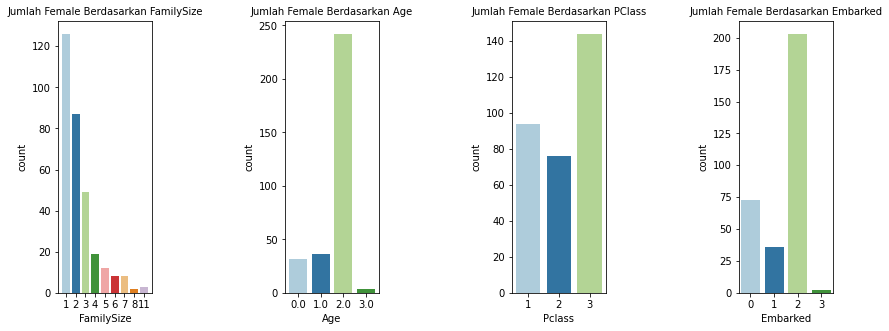

In [ ]:
fig = plt.figure(figsize=(20,5))
spec = gridspec.GridSpec(ncols=10, nrows=1)

#Jumlah Berdasarkan Family Size
figure1 = fig.add_subplot(spec[0])
Pclass1 = sns.countplot(data=SexF, x='FamilySize', palette="Paired") 

Pclass1.set_title("Jumlah Female Berdasarkan FamilySize",fontsize=10)
figure1.plot()
#Jumlah Berdasarkan Age
figure2 = fig.add_subplot(spec[2])
Pclass2 = sns.countplot(data=SexF, x='Age', palette="Paired") 

Pclass2.set_title("Jumlah Female Berdasarkan Age",fontsize=10)
figure2.plot()
# Jumlah berdasarkan PClass
figure4 = fig.add_subplot(spec[4])
Pclass4 = sns.countplot(data=SexF, x='Pclass', palette="Paired") 

Pclass4.set_title("Jumlah Female Berdasarkan PClass",fontsize=10)
figure4.plot()

# Jumlah berdasarkan Embarked
figure5 = fig.add_subplot(spec[6])
Pclass5 = sns.countplot(data=SexF, x='Embarked', palette="Paired") 

Pclass5.set_title("Jumlah Female Berdasarkan Embarked",fontsize=10)
figure4.plot()

In [ ]:
#Jumlah penumpang sesuai Sex
SexF= dfTrain[dfTrain['Sex']==1]

[]

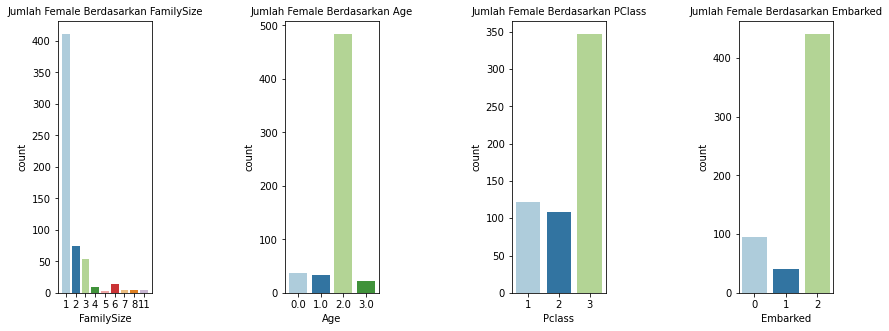

In [ ]:
fig = plt.figure(figsize=(20,5))
spec = gridspec.GridSpec(ncols=10, nrows=1)

#Jumlah Berdasarkan Family Size
figure1 = fig.add_subplot(spec[0])
Pclass1 = sns.countplot(data=SexF, x='FamilySize', palette="Paired") 

Pclass1.set_title("Jumlah Female Berdasarkan FamilySize",fontsize=10)
figure1.plot()
#Jumlah Berdasarkan Age
figure2 = fig.add_subplot(spec[2])
Pclass2 = sns.countplot(data=SexF, x='Age', palette="Paired") 

Pclass2.set_title("Jumlah Female Berdasarkan Age",fontsize=10)
figure2.plot()
# Jumlah berdasarkan PClass
figure4 = fig.add_subplot(spec[4])
Pclass4 = sns.countplot(data=SexF, x='Pclass', palette="Paired") 

Pclass4.set_title("Jumlah Female Berdasarkan PClass",fontsize=10)
figure4.plot()

# Jumlah berdasarkan Embarked
figure5 = fig.add_subplot(spec[6])
Pclass5 = sns.countplot(data=SexF, x='Embarked', palette="Paired") 

Pclass5.set_title("Jumlah Female Berdasarkan Embarked",fontsize=10)
figure4.plot()

Dari hasil data diatas kita tidak dapat menemukan mengapa penumpang perempuan memiliki survivalbility rate lebih tinggi dibanging laki-laki. Akhirnya kami memutuskan untuk research mendalam terkait SOP Keselamatan Jika Terjadi Bencana. 


Diketahui bahwa *Birkenhead drill* merupakan prosedur keselamatan yang terkenal di tahun 1852. Pada tahun 1920 ketika terjadi peristiwa Titanic prosedur ini dilakukan oleh awak kapal sehingga mengakibatkan perempuan dan anak-anak memiliki survivalbility rate yang sangat tinggi. 

source: https://www.mentalfloss.com/posts/women-and-children-first-origins-titanic

Walau memiliki korelasi yang kuat yang dapat kita lihat pada heatmap. Namun variabel sex ini berdiri sendiri tanpa terikat dengan variabel yang lain.

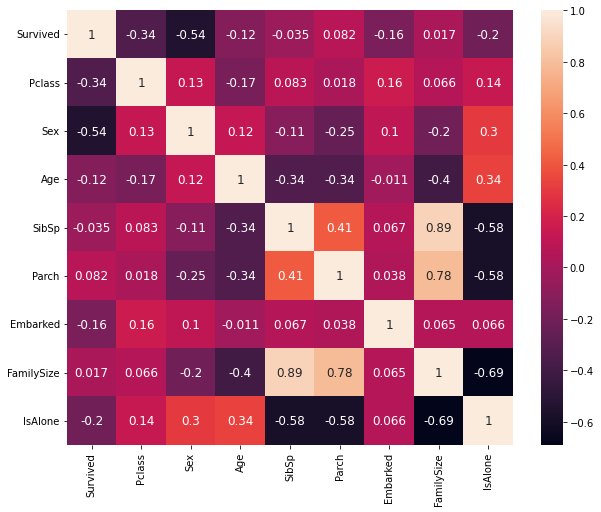

In [ ]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot= True, annot_kws={'fontsize':12})

# Basic Anlysis Result


Dari hasil analisa kami diatas kami melihat ada berbagai macam faktor yang mempengaruhi secara langsung terkait survivalbility rate penumpang titanic antara lain.

1. Penumpang *Female* memiliki potensi keselamatan 74% dibanding penumpang *male* 
2. Penumpang dengan *Pclass* 1 memiliki potensi keselamatan 60% 
3. Penumpang dengan *family size 2-4* memiliki potensi keselamatan lebih tinggi dibanding yang lain dengan 
4. Penumpang yang berumur dibawah 12 tahun memiliki potensi keselamatn 58%
5. Penumpang yang berasal dari France memiliki potensi keselamatan tertinggi karena didsari
    
*   Didominasi penumpang *Female*
*   Didominasi penumpang  dengan *Pclass 1*



# Feature Engineering (Data Correlation)

In [ ]:
dfTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone
0,0,3,1,2.0,1,0,2,2,0
1,1,1,0,2.0,1,0,0,2,0
2,1,3,0,2.0,0,0,2,1,1
3,1,1,0,2.0,1,0,2,2,0
4,0,3,1,2.0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,0,0,2,1,1
887,1,1,0,2.0,0,0,2,1,1
888,0,3,0,2.0,1,2,2,4,0
889,1,1,1,2.0,0,0,0,1,1


Text(0.5, 1.05, 'Pearson Correlation of Features')

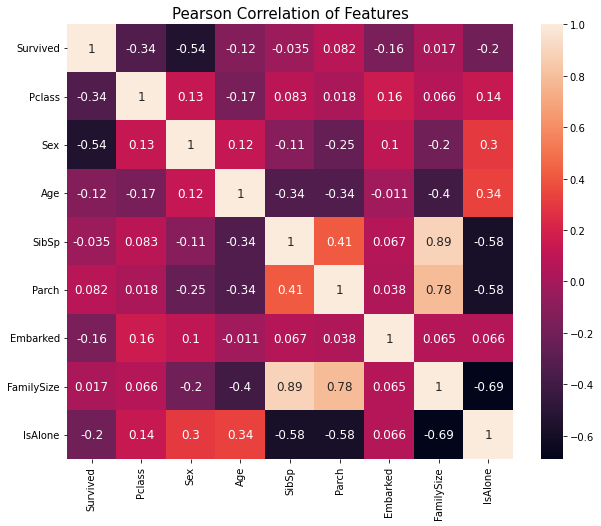

In [ ]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot= True, annot_kws={'fontsize':12})
plt.title('Pearson Correlation of Features', y=1.05, size=15)

Dari data diatas kita dapat memabginya menjadi Positive dan Negative correleation

## Correlation

In [ ]:
#Positive Correlation
PositiveCorr = dfTrain[['Parch','FamilySize']]
PositiveCorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Parch       891 non-null    int64
 1   FamilySize  891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


In [ ]:
#Negative Correlation
NegativeCorr = dfTrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'IsAlone']]
NegativeCorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Embarked  891 non-null    int64  
 5   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


# Modelling

## Data Spliting

In [ ]:
#Data target and feature
targets =  dfTrain[['Survived']]
features = dfTrain.drop('Survived',axis=1)

In [ ]:
# Kita akan membagi data dengan metode 80/20 (Pareto Principle)
#20% test data 80% Train data
xtrain, xtest, ytrain, ytest = train_test_split(features,targets,test_size=0.2)
print("xinput Shape: ", xtrain.shape)
print("ytrain Shape: ", xtest.shape)
print("xtest Shape: ", ytrain.shape)
print("ytest Shape: ", ytest.shape)

xinput Shape:  (712, 8)
ytrain Shape:  (179, 8)
xtest Shape:  (712, 1)
ytest Shape:  (179, 1)


Positive Feature

In [ ]:
features = PositiveCorr

In [ ]:
# Kita akan membagi data dengan metode 80/20 (Pareto Principle)
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(features,targets,test_size=0.2)
print("xinput Shape: ", xtrain1.shape)
print("ytrain Shape: ", xtest1.shape)
print("xtest Shape: ", ytrain1.shape)
print("ytest Shape: ", ytest1.shape)

xinput Shape:  (712, 2)
ytrain Shape:  (179, 2)
xtest Shape:  (712, 1)
ytest Shape:  (179, 1)


Negative Feature

In [ ]:
features = NegativeCorr

In [ ]:
# Kita akan membagi data dengan metode 80/20 (Pareto Principle)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(features,targets,test_size=0.2)
print("xinput Shape: ", xtrain2.shape)
print("ytrain Shape: ", xtest2.shape)
print("xtest Shape: ", ytrain2.shape)
print("ytest Shape: ", ytest2.shape)

xinput Shape:  (712, 6)
ytrain Shape:  (179, 6)
xtest Shape:  (712, 1)
ytest Shape:  (179, 1)


## Training


Random Forest Algorithm


In [ ]:
RFCa = RandomForestClassifier()
RFCa.fit(xtrain,ytrain.values.ravel())
RFCpredA = RFCa.predict(xtest)
print(f'Train Score RandomForestClassifier : {RFCa.score(xtrain, ytrain)}')
print(f'Test Score RandomForestClassifier : {RFCa.score(xtest, ytest)}')


Train Score RandomForestClassifier : 0.8735955056179775
Test Score RandomForestClassifier : 0.7932960893854749


Random Forest Positive Feature

In [ ]:
RFCp=RandomForestClassifier()
RFCp.fit(xtrain1,ytrain1.values.ravel())
RFCpredP=RFCp.predict(xtest1)
print(f'Train Score Positive RandomForestClassifier : {RFCp.score(xtrain1, ytrain1)}')
print(f'Test Score Positive RandomForestClassifier : {RFCp.score(xtest1, ytest1)}')

Train Score Positive RandomForestClassifier : 0.6643258426966292
Test Score Positive RandomForestClassifier : 0.6983240223463687


Random Forest Negative Feature

In [ ]:
RFCn=RandomForestClassifier()
RFCn.fit(xtrain2,ytrain2.values.ravel())
RFCpredN=RFCn.predict(xtest2)
print(f'Train Score Negative RandomForestClassifier : {RFCn.score(xtrain2, ytrain2)}')
print(f'Test Score Negative RandomForestClassifier : {RFCn.score(xtest2, ytest2)}')

Train Score Negative RandomForestClassifier : 0.8539325842696629
Test Score Negative RandomForestClassifier : 0.8435754189944135


# Prediction Output

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Random Forest Classifier
PredictionOutputRFCA = pd.DataFrame(RFCpredA, columns=['Prediction'])
PredictionOutputRFCA["Survived"] = pd.DataFrame(ytest.reset_index()['Survived'])


print(PredictionOutputRFCA)

     Prediction  Survived
0             1         1
1             1         1
2             0         0
3             0         1
4             0         0
..          ...       ...
174           0         0
175           0         0
176           0         1
177           0         1
178           0         0

[179 rows x 2 columns]


In [ ]:
PredictionOutputRFCA.to_csv('AllFeatureResult.csv')

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
print(PredictionOutputRFCA)

     Prediction  Survived
0             1         1
1             1         1
2             0         0
3             0         1
4             0         0
5             1         1
6             0         1
7             0         0
8             0         1
9             1         1
10            0         0
11            0         1
12            0         0
13            1         1
14            0         0
15            0         0
16            0         0
17            1         1
18            1         1
19            0         0
20            1         1
21            0         0
22            1         1
23            0         0
24            0         0
25            1         1
26            1         0
27            0         1
28            1         1
29            0         1
30            0         0
31            0         0
32            0         1
33            0         1
34            1         0
35            0         1
36            1         1
37          

In [ ]:
#Positive
# Random Forest Classifier
PredictionOutputRFCP = pd.DataFrame(RFCpredP, columns=['Prediction'])
PredictionOutputRFCP["Survived"] = pd.DataFrame(ytest1.reset_index()['Survived'])
PredictionOutputRFCP

,Prediction,Survived
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,1
6,1,1
7,0,0
8,0,0
9,0,0


In [ ]:
PredictionOutputRFCP.to_csv('PositiveFeatureResult.csv')

In [ ]:
# NEGATIVE
# Random Forest Classifier
PredictionOutputRFCN=pd.DataFrame(RFCpredN, columns=['Prediction'])
PredictionOutputRFCN["Survived"] = pd.DataFrame(ytest2.reset_index()['Survived'])
PredictionOutputRFCN

,Prediction,Survived
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


In [ ]:
PredictionOutputRFCN.to_csv('NegativeFeatureResult.csv')

# Evaluation on Machine Learning performance

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training Data")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    print(title)
    print("train_scores_mean", train_scores_mean)
    print("cv_scores_mean", test_scores_mean, "\n")

    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

Learning Curve all data

Learning Curves All Features
train_scores_mean [0.92857143 0.87065217 0.87307692 0.87681818 0.87662566]
cv_scores_mean [0.74439082 0.80903181 0.80906136 0.81748252 0.81889097] 



<Figure size 792x360 with 0 Axes>

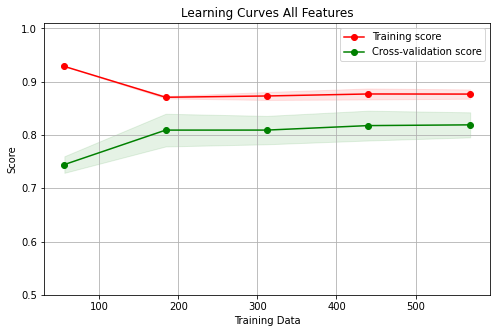

In [ ]:
# Cross validation with 5 iterations each time with 20% data 
# randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(11,5))

title = "Learning Curves All Features"
estimator = RandomForestClassifier()
g3 = plot_learning_curve(estimator, title, xtrain, ytrain,
                    ylim=(0.5, 1.01), cv=5, n_jobs=-1)

Positive Correlation all data

Learning Curves Positive Features
train_scores_mean [0.68214286 0.7        0.69423077 0.67909091 0.66678383]
cv_scores_mean [0.61229193 0.62633704 0.65586526 0.64459766 0.64740471] 



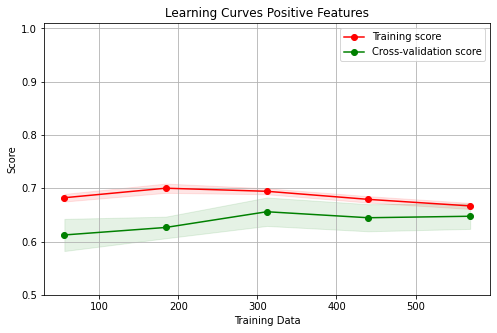

In [ ]:
title = "Learning Curves Positive Features"
estimator = RandomForestClassifier()
g3 = plot_learning_curve(estimator, title, xtrain1, ytrain1,
                    ylim=(0.5, 1.01), cv=5, n_jobs=-1)

Negative Correlation data 

Learning Curves Negative Features
train_scores_mean [0.94285714 0.88152174 0.86282051 0.85363636 0.85518453]
cv_scores_mean [0.75844578 0.7879346  0.80058111 0.81880232 0.81600512] 



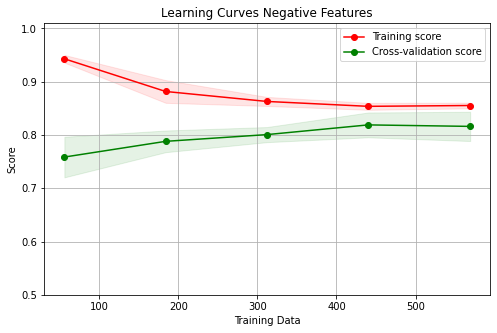

In [ ]:
title = "Learning Curves Negative Features"
estimator = RandomForestClassifier()
g3 = plot_learning_curve(estimator, title, xtrain2, ytrain2,
                    ylim=(0.5, 1.01), cv=5, n_jobs=-1)

Dari hasil kurva diatas kita dapat melihat bahwa Random Forest tree memiliki peforma yang baik untuk mempelajari training file. Namun ketika berhadapan dengan test case yang berbeda-beda Random Forest memeiliki kelemahan ketika menghadapi test case berbeda dari yang dipelajari.

# Reference

[1] A. G. Kosheleva Vladik Kreinovich, and Olga, “Why 70/30 or 80/20 Relation Between Training and Testing Sets: A Pedagogical Explanation”.

[2] M. Hardy, “Pareto’s Law,” The Mathematical Intelligencer, vol. 32, no. 3, pp. 38–43, Jul. 2010, doi: 10.1007/s00283-010-9159-2.

[3] M. Debczak, “The Origins of ‘Women and Children’ First,” Mental Floss, Apr. 19, 2022. [Online]. Available: https://www.mentalfloss.com/posts/women-and-children-first-origins-titanic

[4]B. S. Frey, D. A. Savage, and B. Torgler, “Noblesse oblige? Determinants of survival in a life-and-death situation,” Journal of Economic Behavior & Organization, vol. 74, no. 1–2, pp. 1–11, May 2010, doi: 10.1016/j.jebo.2010.02.005.

[5]J. Nithyashri and G. Kulanthaivel, “Classification of human age based on Neural Network using FG-NET Aging database and Wavelets,” 2012 Fourth International Conference on Advanced Computing (ICoAC), Dec. 2012, doi: 10.1109/icoac.2012.6416855.
